# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [2]:
%run ../tests/test_algorithms.py

C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\tests\test_algorithms.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
........
----------------------------------------------------------------------
Ran 8 tests in 0.111s

OK


In [3]:
%run ../tests/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.040s

OK


In [207]:
%run ../tests/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [202]:
%run ../tests/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Running example of the system

In [10]:
%run ../tools/algorithms.py

In [11]:
%run ../tools/dataloader.py

In [159]:
test = DataLoader('aapl', '2010-01-01', '2010-02-10')

In [160]:
prices = test.get_close()

In [161]:
prices

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
2010-01-11,7.503929
2010-01-12,7.418571
2010-01-13,7.523214
2010-01-14,7.479643


In [10]:
#prices = np.array(prices)
#len(prices)

In [11]:
prices

,Close
Date,
2005-02-01,1.384464
2005-02-02,1.421964
2005-02-03,1.389464
2005-02-04,1.407857
2005-02-07,1.409643
...,...
2010-02-04,6.858929
2010-02-05,6.980714
2010-02-08,6.932857


In [205]:
%run ../tools/predictorsI.py

In [78]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [79]:
op0.create_bilstm()

In [80]:
op0.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 25, 100)           20800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [81]:
op0.fit_model(10)

Epoch 1/10
300/300 [==============================] - 4s 13ms/step - loss: 98.5609 - mean_squared_error: 98.5609 - val_loss: 667.0622 - val_mean_squared_error: 667.0622
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.8662 - mean_squared_error: 0.8662 - val_loss: 842.8424 - val_mean_squared_error: 842.8424
Epoch 3/10
300/300 [==============================] - 3s 11ms/step - loss: 0.8192 - mean_squared_error: 0.8192 - val_loss: 837.6218 - val_mean_squared_error: 837.6218
Epoch 4/10
300/300 [==============================] - 3s 11ms/step - loss: 0.6752 - mean_squared_error: 0.6752 - val_loss: 572.7731 - val_mean_squared_error: 572.7731
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.8356 - mean_squared_error: 0.8356 - val_loss: 366.5086 - val_mean_squared_error: 366.5086
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.6608 - mean_squared_error: 0.6608 - val_loss: 285.0151 - val_mean_squared_error: 285.0

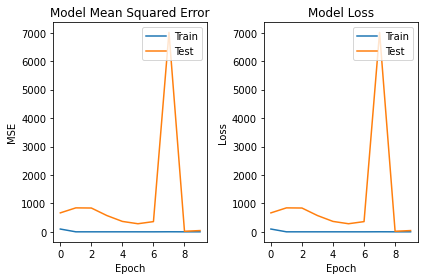

In [82]:
op0.show_performance()

In [83]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [84]:
nice = op0.predict(oyea)
nice

array([[66.347404, 62.250694, 64.18538 , 62.9824  , 68.289185, 70.74629 ,
        71.76722 ]], dtype=float32)

In [20]:
op1.create_lstm()

In [21]:
op1.model_blueprint()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 25, 40)            6720      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 50)            18200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [22]:
op1.fit_model(10)

Epoch 1/10
99/99 [==============================] - 2s 24ms/step - loss: 5.8381 - mean_squared_error: 5.8381 - val_loss: 0.2938 - val_mean_squared_error: 0.2938
Epoch 2/10
99/99 [==============================] - 2s 23ms/step - loss: 0.2245 - mean_squared_error: 0.2245 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 3/10
99/99 [==============================] - 2s 24ms/step - loss: 0.1388 - mean_squared_error: 0.1388 - val_loss: 0.4296 - val_mean_squared_error: 0.4296
Epoch 4/10
99/99 [==============================] - 2s 24ms/step - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 5/10
99/99 [==============================] - 2s 24ms/step - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1590 - val_mean_squared_error: 0.1590
Epoch 6/10
99/99 [==============================] - 2s 24ms/step - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 0.3347 - val_mean_squared_error: 0.3347
Epoch 7/10
99/99 [================

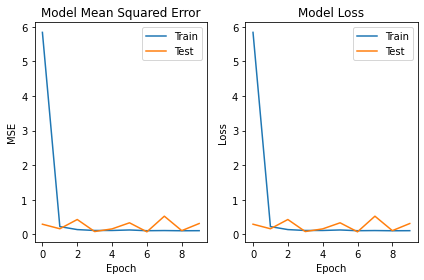

In [23]:
op1.show_performance()

In [24]:
nice = op1.predict(oyea)
nice

array([[6.2591257, 6.1474586, 6.2644973, 6.408188 , 5.7055945, 5.888523 ,
        5.9141483]], dtype=float32)

In [25]:
op2.create_cnn()

In [26]:
op2.model_blueprint()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                17650     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
__________________________________________________

In [27]:
op2.fit_model(10)

Epoch 1/10
99/99 [==============================] - 0s 5ms/step - loss: 1.9747 - mean_squared_error: 1.9747 - val_loss: 0.1920 - val_mean_squared_error: 0.1920
Epoch 2/10
99/99 [==============================] - 0s 3ms/step - loss: 0.2036 - mean_squared_error: 0.2036 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 3/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1732 - mean_squared_error: 0.1732 - val_loss: 0.1637 - val_mean_squared_error: 0.1637
Epoch 5/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 6/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1407 - mean_squared_error: 0.1407 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 7/10
99/99 [======================

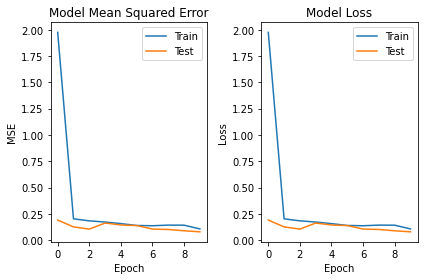

In [28]:
op2.show_performance()

In [29]:
nice = op2.predict(oyea)
nice

array([[7.0427475, 7.197059 , 7.0844097, 7.041202 , 7.2669926, 7.009579 ,
        6.9943085]], dtype=float32)

In [30]:
op3.create_mlp()

In [31]:
op3.model_blueprint()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 182       
Total params: 3,407
Trainable params: 3,407
Non-trainable params: 0
_________________________________________________________________


In [32]:
op3.fit_model(100)

Epoch 1/100
99/99 [==============================] - 0s 2ms/step - loss: 2.7225 - mean_squared_error: 2.7225 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1762 - mean_squared_error: 0.1762 - val_loss: 0.1598 - val_mean_squared_error: 0.1598
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1471 - mean_squared_error: 0.1471 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1310 - mean_squared_error: 0.1310 - val_loss: 0.1037 - val_mean_squared_error: 0.1037
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1504 - val_mean_squared_error: 0.1504
Epoch 7/100
99/99 [===============

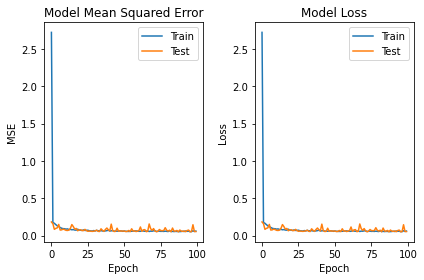

In [33]:
op3.show_performance()

In [34]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [35]:
nice = op3.predict(oyea)
nice

array([[6.919198 , 7.014857 , 6.9514136, 7.097626 , 6.933123 , 6.9343333,
        6.9087744]], dtype=float32)

In [184]:
%run ../tools/predictorsII.py

In [185]:
oo = UnivariatePredictorII(prices, 7)

In [69]:
oo.fit_neural_model(300,"D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO:nprophet.config:Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
INFO:nprophet:learning rate range test found optimal lr: 1.87E-01
Epoch[300/300]: 100%|█| 300/300 [00:47<00:00,  6.33it/s, SmoothL1Loss=0.00267, MAE=1.74, RegLoss=0, MAE_val=12.6, Smoot


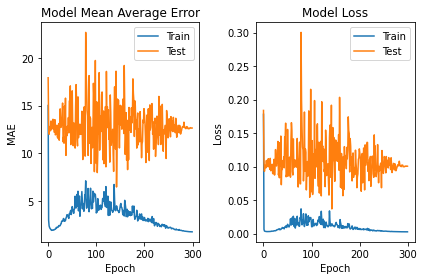

In [71]:
oo.show_performance_neural()

In [72]:
oo.predict_neural()

0    38.539516
1    38.573391
2    38.578331
3    38.556149
4    35.620384
5    35.625614
6    38.646553
Name: yhat1, dtype: float64

In [186]:
oo.fit_prophet_model()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


INFO:fbprophet:Making 3 forecasts with cutoffs between 2010-01-27 00:00:00 and 2010-02-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 00:00:00,0.017185,0.131092,0.112709,0.015957,0.015957,0.5
1,1 days 12:00:00,0.012025,0.109659,0.109659,0.015768,0.015768,1.0
2,2 days 00:00:00,0.076562,0.276699,0.276360,0.039957,0.039957,0.0
3,2 days 12:00:00,0.013012,0.114069,0.114069,0.016307,0.016307,1.0
4,3 days 12:00:00,0.001124,0.033520,0.033520,0.004711,0.004711,1.0
5,4 days 12:00:00,0.007828,0.088477,0.088477,0.012900,0.012900,1.0
6,5 days 00:00:00,0.049827,0.223219,0.216097,0.031108,0.031108,0.0
7,5 days 12:00:00,0.048146,0.219422,0.219422,0.031433,0.031433,0.0
8,6 days 00:00:00,0.064401,0.253773,0.246595,0.035231,0.035231,0.0
9,7 days 00:00:00,0.025905,0.160951,0.160716,0.022812,0.022812,0.0


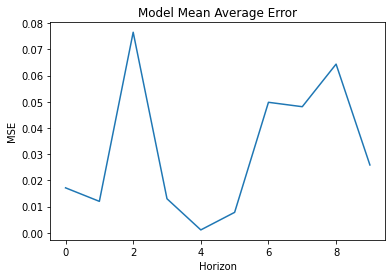

In [187]:
oo.show_performance_prophet()

In [74]:
oo.predict_prophet()

3782    61.392095
3783    61.369899
3784    61.407161
3785    61.358791
3786    61.396530
3787    61.400888
3788    61.404424
Name: yhat, dtype: float64